# Iris Pytorch

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1U1ckFG-C1A7j5OzZ_PlF-durNt2HTy7T'
output = 'Iris.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1U1ckFG-C1A7j5OzZ_PlF-durNt2HTy7T
To: /content/Iris.csv
100%|██████████| 5.11k/5.11k [00:00<00:00, 5.81MB/s]


'Iris.csv'

You can download iris dataset from https://www.kaggle.com/datasets/saurabh00007/iriscsv and upload to this cloab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# Prepare Dataset

In [ ]:
data0 = pd.read_csv("Iris.csv")
print(data0.columns.tolist())
print(len(data0))

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
150


In [ ]:
data0

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


LabelEncoding The Attributes of The Target Column


In [ ]:
Name0=data0.Species.unique().tolist()
Name=sorted(Name0)
print(Name)
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))
print(len(Name))
print(normal_mapping)
print(reverse_mapping)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
3
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [ ]:
data0['Species']=data0['Species'].map(normal_mapping)

In [ ]:
data0

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
m=len(data0)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [ ]:
dataY=data0['Species']
dataX=data0.drop('Species',axis=1)
dataX=dataX.drop('Id',axis=1)

In [ ]:
trainX, testX, trainY, testY = train_test_split(
            dataX, dataY, test_size=0.25, random_state=42)

In [ ]:
print(type(trainX))
print(type(trainY))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
trainY=torch.from_numpy(np.array(trainY)).type(torch.LongTensor)
trainX=torch.from_numpy(np.array(trainX)).float()
testY=torch.from_numpy(np.array(testY)).type(torch.LongTensor)
testX=torch.from_numpy(np.array(testX)).float()

In [ ]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(trainX) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
train_ds = torch.utils.data.TensorDataset(trainX,trainY)
test_ds = torch.utils.data.TensorDataset(testX,testY)

In [ ]:
batch_size = 16
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Create Logistic Regression Model

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 4
output_dim = len(Name)
model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (image, labels) in enumerate(train_loader):


        train = Variable(image.view(-1,4))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)   #####
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0

            for images, labels in test_loader:
                test = Variable(images.view(-1,4))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 50 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 1.5631847381591797  Accuracy: 28.947368621826172%
Iteration: 100  Loss: 1.2090095281600952  Accuracy: 39.47368240356445%
Iteration: 150  Loss: 1.1238183975219727  Accuracy: 34.21052551269531%
Iteration: 200  Loss: 1.2079306840896606  Accuracy: 31.578947067260742%
Iteration: 250  Loss: 1.0627938508987427  Accuracy: 31.578947067260742%
Iteration: 300  Loss: 1.1273393630981445  Accuracy: 31.578947067260742%
Iteration: 350  Loss: 1.0488708019256592  Accuracy: 31.578947067260742%
Iteration: 400  Loss: 1.0437486171722412  Accuracy: 31.578947067260742%
Iteration: 450  Loss: 1.055981159210205  Accuracy: 31.578947067260742%
Iteration: 500  Loss: 0.964650571346283  Accuracy: 31.578947067260742%
Iteration: 550  Loss: 0.9576761722564697  Accuracy: 31.578947067260742%
Iteration: 600  Loss: 0.9804782867431641  Accuracy: 31.578947067260742%
Iteration: 650  Loss: 0.9227815270423889  Accuracy: 36.842105865478516%
Iteration: 700  Loss: 0.9200432896614075  Accuracy: 39.47368240356445

KeyboardInterrupt: ignored

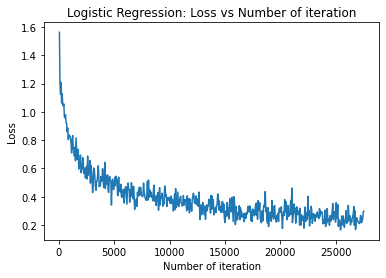

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [ ]:
model

LogisticRegressionModel(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
test_outputs = model(testX)
test_predicted = torch.max(test_outputs.data,1)[1]

In [ ]:
ANS=testY.numpy()
PRED=test_predicted.numpy()
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

1.0
